In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time



In [ ]:
# to click on 50 more and load all the movies

In [ ]:
#load all movie names to the df

In [ ]:
#to click for genre

In [25]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import time
import random
from selenium import webdriver
from selenium.webdriver.common.by import By

# Set up Selenium WebDriver
driver = webdriver.Chrome()
driver.get("https://www.imdb.com/search/title/?title_type=feature&release_date=2024-01-01,2024-12-31")
time.sleep(1)  # Wait for initial load

# Load movies by clicking "50 more" until 1000 movies are loaded
while True:
    movie_elements = driver.find_elements(By.CLASS_NAME, "ipc-title-link-wrapper")
    if len(movie_elements) >= 1000:
        break
    buttons = driver.find_elements(By.XPATH, "//span[text()='50 more']/ancestor::button")
    if not buttons:
        break
    button = buttons[0]
    driver.execute_script("arguments[0].scrollIntoView(true);", button)
    time.sleep(1)
    driver.execute_script("arguments[0].click();", button)
    time.sleep(2)  # Wait for new content

# Collect movie titles and links (after all content loaded)
movie_elements = driver.find_elements(By.CLASS_NAME, "ipc-title-link-wrapper")
movies = []
for elem in movie_elements:
    title = elem.text.strip()
    link = elem.get_attribute("href")
    if title and link:
        movies.append((title, link))
    if len(movies) >= 1000:
        break

driver.quit()

# Headers for requests
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Prepare data
data = []

# Scrape each movie's details
for i, (title, link) in enumerate(movies, start=1):
    try:
        response = requests.get(link, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        script_tag = soup.find("script", type="application/ld+json")
        if script_tag:
            json_data = json.loads(script_tag.string)

            genres = json_data.get("genre", [])
            if isinstance(genres, str):
                genres = [genres]

            directors = json_data.get("director", [])
            if isinstance(directors, dict):
                directors = [directors.get("name")]
            else:
                directors = [d.get("name") for d in directors]

            rating = json_data.get("aggregateRating", {}).get("ratingValue", "N/A")
            votes = json_data.get("aggregateRating", {}).get("ratingCount", "N/A")
            duration = json_data.get("duration", "N/A").replace("PT", "").lower()
            duration = duration.replace("h", " hr ").replace("m", " min")

            data.append({
                "Title": title,
                "Link": link,
                "Genres": ", ".join(genres),
                "Directors": ", ".join(directors),
                "Rating": rating,
                "Votes": votes,
                "Duration": duration
            })

            print(f"✅ Collected: {len(data)} / 1000 — {title}")

            # Auto-save backup every 100 movies
            if len(data) % 100 == 0:
                pd.DataFrame(data).to_csv("imdb_autosave_2024.csv", index=False)
                print("💾 Auto-saved at", len(data))

        time.sleep(random.uniform(1, 3))  # polite crawling delay

    except requests.exceptions.Timeout:
        print(f"⏰ Timeout while accessing: {link}")
        continue
    except Exception as e:
        print(f"⚠️ Error scraping {title}: {e}")
        continue

# Final save
df = pd.DataFrame(data)
df.to_csv("imdb_2024_movies_detailed.csv", index=False)
print("✅ Data saved to imdb_2024_movies_detailed.csv")


✅ Collected: 1 / 1000 — 1. The Life of Chuck
✅ Collected: 2 / 1000 — 2. The Surfer
✅ Collected: 3 / 1000 — 3. Heretic
✅ Collected: 4 / 1000 — 4. Friendship
✅ Collected: 5 / 1000 — 5. The Wild Robot
✅ Collected: 6 / 1000 — 6. Gladiator II
✅ Collected: 7 / 1000 — 7. Anora
✅ Collected: 8 / 1000 — 8. The Brutalist
✅ Collected: 9 / 1000 — 9. A Complete Unknown
✅ Collected: 10 / 1000 — 10. Wicked
✅ Collected: 11 / 1000 — 11. Parthenope
✅ Collected: 12 / 1000 — 12. Nosferatu
✅ Collected: 13 / 1000 — 13. The Substance
✅ Collected: 14 / 1000 — 14. Conclave
✅ Collected: 15 / 1000 — 15. Presence
✅ Collected: 16 / 1000 — 16. Venom: The Last Dance
✅ Collected: 17 / 1000 — 17. Babygirl
✅ Collected: 18 / 1000 — 18. Dune: Part Two
✅ Collected: 19 / 1000 — 19. The Beekeeper
✅ Collected: 20 / 1000 — 20. The Salt Path
✅ Collected: 21 / 1000 — 21. Alien: Romulus
✅ Collected: 22 / 1000 — 22. Speak No Evil
✅ Collected: 23 / 1000 — 23. Amongst the Wolves
✅ Collected: 24 / 1000 — 24. Twisters
✅ Collected: 25 

✅ Collected: 184 / 1000 — 184. How to Make Millions Before Grandma Dies
✅ Collected: 185 / 1000 — 185. Rumours
✅ Collected: 186 / 1000 — 186. Ask Me What You Want
✅ Collected: 187 / 1000 — 187. Hard Truths
✅ Collected: 188 / 1000 — 188. Greedy People
✅ Collected: 189 / 1000 — 189. All We Imagine as Light
✅ Collected: 190 / 1000 — 190. Nr. 24
✅ Collected: 191 / 1000 — 191. Bring Them Down
✅ Collected: 192 / 1000 — 192. Sidelined: The QB and Me
✅ Collected: 193 / 1000 — 193. Spaceman
✅ Collected: 194 / 1000 — 194. The Curse of the Necklace
✅ Collected: 195 / 1000 — 195. Blitz
✅ Collected: 196 / 1000 — 196. Take Cover
✅ Collected: 197 / 1000 — 197. Apartment 7A
✅ Collected: 198 / 1000 — 198. Absolution
✅ Collected: 199 / 1000 — 199. The Shrouds
✅ Collected: 200 / 1000 — 200. Exhuma
💾 Auto-saved at 200
✅ Collected: 201 / 1000 — 201. 40 Acres
✅ Collected: 202 / 1000 — 202. Apocalypse Z: The Beginning of the End
✅ Collected: 203 / 1000 — 203. Never Let Go
✅ Collected: 204 / 1000 — 204. Hellb

✅ Collected: 364 / 1000 — 364. Dark Match
✅ Collected: 365 / 1000 — 365. Lal Salaam
✅ Collected: 366 / 1000 — 366. Classified
✅ Collected: 367 / 1000 — 367. When Fall Is Coming
✅ Collected: 368 / 1000 — 368. The Remarkable Life of Ibelin
✅ Collected: 369 / 1000 — 369. On Becoming a Guinea Fowl
✅ Collected: 370 / 1000 — 370. The Inheritance
✅ Collected: 371 / 1000 — 371. Cabrini
✅ Collected: 372 / 1000 — 372. Sookshma Darshini
✅ Collected: 373 / 1000 — 373. Amaran
✅ Collected: 374 / 1000 — 374. The Radleys
✅ Collected: 375 / 1000 — 375. Eephus
✅ Collected: 376 / 1000 — 376. Role Play
✅ Collected: 377 / 1000 — 377. Misericordia
✅ Collected: 378 / 1000 — 378. A Desert
✅ Collected: 379 / 1000 — 379. V/H/S/Beyond
✅ Collected: 380 / 1000 — 380. Tina
✅ Collected: 381 / 1000 — 381. Boundless
✅ Collected: 382 / 1000 — 382. Bramayugam
✅ Collected: 383 / 1000 — 383. The Last Breath
✅ Collected: 384 / 1000 — 384. April
✅ Collected: 385 / 1000 — 385. The Girl in the Pool
✅ Collected: 386 / 1000 — 3

✅ Collected: 540 / 1000 — 540. Here After
✅ Collected: 541 / 1000 — 541. Yodha
✅ Collected: 542 / 1000 — 542. I, the Executioner
✅ Collected: 543 / 1000 — 543. Escape from the 21st Century
✅ Collected: 544 / 1000 — 544. We Were Dangerous
✅ Collected: 545 / 1000 — 545. Vulgar
✅ Collected: 546 / 1000 — 546. Space Cadet
✅ Collected: 547 / 1000 — 547. Hounds of War
✅ Collected: 548 / 1000 — 548. Hidden Face
✅ Collected: 549 / 1000 — 549. Hear Me: Our Summer
✅ Collected: 550 / 1000 — 550. Adult Best Friends
✅ Collected: 551 / 1000 — 551. Through My Window: Looking at You
✅ Collected: 552 / 1000 — 552. Please Don't Feed the Children
✅ Collected: 553 / 1000 — 553. Motel Destino
✅ Collected: 554 / 1000 — 554. Dying
✅ Collected: 555 / 1000 — 555. Saint-Exupéry
✅ Collected: 556 / 1000 — 556. Afternoons of Solitude
✅ Collected: 557 / 1000 — 557. Harley Flanagan: Wired for Chaos
✅ Collected: 558 / 1000 — 558. The Astronaut Lovers
✅ Collected: 559 / 1000 — 559. S.T.A.L.K.E.R.: Shadow of the Zone
✅ 

✅ Collected: 715 / 1000 — 715. The Strangers' Case
✅ Collected: 716 / 1000 — 716. The Glassworker
✅ Collected: 717 / 1000 — 717. Thalavan
✅ Collected: 718 / 1000 — 718. Red Right Hand
✅ Collected: 719 / 1000 — 719. When the Light Breaks
✅ Collected: 720 / 1000 — 720. Black Cab
✅ Collected: 721 / 1000 — 721. Dead Money
✅ Collected: 722 / 1000 — 722. The Damned
✅ Collected: 723 / 1000 — 723. U Are the Universe
✅ Collected: 724 / 1000 — 724. The Way, My Way
✅ Collected: 725 / 1000 — 725. Indian 2
✅ Collected: 726 / 1000 — 726. Let's Start a Cult
✅ Collected: 727 / 1000 — 727. The Air He Breathes
✅ Collected: 728 / 1000 — 728. Guns & Moses
✅ Collected: 729 / 1000 — 729. Shepherds
✅ Collected: 730 / 1000 — 730. A Legend
✅ Collected: 731 / 1000 — 731. Crew
✅ Collected: 732 / 1000 — 732. Soul Reaper
✅ Collected: 733 / 1000 — 733. The Last Redemption
✅ Collected: 734 / 1000 — 734. The Great Ambition
✅ Collected: 735 / 1000 — 735. TL
✅ Collected: 736 / 1000 — 736. How to Make Gravy
✅ Collected:

✅ Collected: 892 / 1000 — 892. Memories of a Burning Body
✅ Collected: 893 / 1000 — 893. 18×2 Beyond Youthful Days
✅ Collected: 894 / 1000 — 894. Siccin 7
✅ Collected: 895 / 1000 — 895. Lesson Learned
✅ Collected: 896 / 1000 — 896. And Mrs
✅ Collected: 897 / 1000 — 897. Rifle Club
✅ Collected: 898 / 1000 — 898. Detained
✅ Collected: 899 / 1000 — 899. Manas
✅ Collected: 900 / 1000 — 900. Fight Like a Girl
💾 Auto-saved at 900
✅ Collected: 901 / 1000 — 901. The World According to Kaleb: On Tour
✅ Collected: 902 / 1000 — 902. Katas
✅ Collected: 903 / 1000 — 903. Taboo: Family Secrets
✅ Collected: 904 / 1000 — 904. I Am Nevenka
✅ Collected: 905 / 1000 — 905. Mafia Wars
✅ Collected: 906 / 1000 — 906. Given 3: To the Sea
✅ Collected: 907 / 1000 — 907. The Bunker
✅ Collected: 908 / 1000 — 908. Reputation
✅ Collected: 909 / 1000 — 909. Hard Home
✅ Collected: 910 / 1000 — 910. The Greatest
✅ Collected: 911 / 1000 — 911. Billy & Molly: An Otter Love Story
✅ Collected: 912 / 1000 — 912. Familia
✅ 

In [26]:
df

,Title,Link,Genres,Directors,Rating,Votes,Duration
0,1. The Life of Chuck,https://www.imdb.com/title/tt12908150/?ref_=sr...,"Drama, Fantasy, Sci-Fi",Mike Flanagan,7.6,2830,1 hr 51 min
1,2. The Surfer,https://www.imdb.com/title/tt27813235/?ref_=sr...,Thriller,Lorcan Finnegan,6.2,6563,1 hr 40 min
2,3. Heretic,https://www.imdb.com/title/tt28015403/?ref_=sr...,"Horror, Thriller","Scott Beck, Bryan Woods",7,156880,1 hr 51 min
3,4. Friendship,https://www.imdb.com/title/tt30505698/?ref_=sr...,Comedy,Andrew DeYoung,7.3,7863,1 hr 40 min
4,5. The Wild Robot,https://www.imdb.com/title/tt29623480/?ref_=sr...,"Animation, Sci-Fi",Chris Sanders,8.2,178272,1 hr 42 min
...,...,...,...,...,...,...,...
995,996. A Christmas Castle Proposal: A Royal in P...,https://www.imdb.com/title/tt29922811/?ref_=sr...,Romance,Adrian Powers,6.4,338,n/a
996,997. Faye,https://www.imdb.com/title/tt32220386/?ref_=sr...,"Documentary, Biography",Laurent Bouzereau,7.1,3105,1 hr 31 min
997,998. Bloodline Killer,https://www.imdb.com/title/tt13899250/?ref_=sr...,"Crime, Horror, Mystery",Ante Novakovic,4.3,5015,1 hr 45 min
998,999. Bad Boy in Love,https://www.imdb.com/title/tt27524980/?ref_=sr...,"Drama, Romance",Hanny Saputra,8.7,19,1 hr 31 min


In [27]:
df1 = df.copy()


In [28]:
df1

,Title,Link,Genres,Directors,Rating,Votes,Duration
0,1. The Life of Chuck,https://www.imdb.com/title/tt12908150/?ref_=sr...,"Drama, Fantasy, Sci-Fi",Mike Flanagan,7.6,2830,1 hr 51 min
1,2. The Surfer,https://www.imdb.com/title/tt27813235/?ref_=sr...,Thriller,Lorcan Finnegan,6.2,6563,1 hr 40 min
2,3. Heretic,https://www.imdb.com/title/tt28015403/?ref_=sr...,"Horror, Thriller","Scott Beck, Bryan Woods",7,156880,1 hr 51 min
3,4. Friendship,https://www.imdb.com/title/tt30505698/?ref_=sr...,Comedy,Andrew DeYoung,7.3,7863,1 hr 40 min
4,5. The Wild Robot,https://www.imdb.com/title/tt29623480/?ref_=sr...,"Animation, Sci-Fi",Chris Sanders,8.2,178272,1 hr 42 min
...,...,...,...,...,...,...,...
995,996. A Christmas Castle Proposal: A Royal in P...,https://www.imdb.com/title/tt29922811/?ref_=sr...,Romance,Adrian Powers,6.4,338,n/a
996,997. Faye,https://www.imdb.com/title/tt32220386/?ref_=sr...,"Documentary, Biography",Laurent Bouzereau,7.1,3105,1 hr 31 min
997,998. Bloodline Killer,https://www.imdb.com/title/tt13899250/?ref_=sr...,"Crime, Horror, Mystery",Ante Novakovic,4.3,5015,1 hr 45 min
998,999. Bad Boy in Love,https://www.imdb.com/title/tt27524980/?ref_=sr...,"Drama, Romance",Hanny Saputra,8.7,19,1 hr 31 min


# EDA

In [29]:
df1.isnull().sum()


Title        0
Link         0
Genres       0
Directors    0
Rating       0
Votes        0
Duration     0
dtype: int64

In [30]:
df1.isnull().values.any()


False

In [32]:
df1.isnull().sum().sum()


0

In [34]:
df1[df1['Genres'].str.strip() == '']


,Title,Link,Genres,Directors,Rating,Votes,Duration
351,352. Sooryavansham,https://www.imdb.com/title/tt32832188/?ref_=sr...,,Rajnish Mishra,8.1,22,2 hr 17 min
767,768. Ebony and Ivory,https://www.imdb.com/title/tt33131034/?ref_=sr...,,Jim Hosking,5.4,38,1 hr 28 min
967,968. XXX Premis Butaca,https://www.imdb.com/title/tt34678691/?ref_=sr...,,Ruben Arcos,7.8,10,2 hr 7 min


In [35]:
df1 = df1[~df1['Genres'].str.strip().eq('')]


In [36]:
df1[df1['Genres'].str.strip() == '']

,Title,Link,Genres,Directors,Rating,Votes,Duration


In [37]:
# Shape of the dataset
print("Shape:", df1.shape)

# Data types and non-null counts
df1.info()

# Summary statistics (for numeric columns)
df1.describe()


Shape: (997, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      997 non-null    object
 1   Link       997 non-null    object
 2   Genres     997 non-null    object
 3   Directors  997 non-null    object
 4   Rating     997 non-null    object
 5   Votes      997 non-null    object
 6   Duration   997 non-null    object
dtypes: object(7)
memory usage: 62.3+ KB


,Title,Link,Genres,Directors,Rating,Votes,Duration
count,997,997,997,997,997.0,997,997
unique,997,997,213,969,67.0,939,115
top,1. The Life of Chuck,https://www.imdb.com/title/tt12908150/?ref_=sr...,Drama,Bobby Bonifacio Jr.,6.2,51,1 hr 30 min
freq,1,1,111,5,50.0,3,31


In [41]:
df1.loc[:, 'Votes'] = df1['Votes'].replace('N/A', '0')
df1.loc[:, 'Rating'] = df1['Rating'].replace('N/A', '0')

In [45]:
df1.loc[:, 'Votes'] = df1['Votes'].astype(int)
df1.loc[:, 'Rating'] = df1['Rating'].astype(float)


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      997 non-null    object 
 1   Link       997 non-null    object 
 2   Genres     997 non-null    object 
 3   Directors  997 non-null    object 
 4   Rating     997 non-null    float64
 5   Votes      997 non-null    int32  
 6   Duration   997 non-null    object 
dtypes: float64(1), int32(1), object(5)
memory usage: 58.4+ KB


In [48]:
import re

# Function to convert duration string to minutes
def convert_to_minutes(duration):
    if isinstance(duration, str):
        match = re.match(r'(?:(\d+)\s*hr)?\s*(?:(\d+)\s*min)?', duration.strip())
        if match:
            hours = int(match.group(1)) if match.group(1) else 0
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
    return 0  # default for unexpected or missing values

# Apply conversion using .loc
df1.loc[:, 'Duration_Minutes'] = df1['Duration'].apply(convert_to_minutes)


In [49]:
df1

,Title,Link,Genres,Directors,Rating,Votes,Duration,Duration_Minutes
0,1. The Life of Chuck,https://www.imdb.com/title/tt12908150/?ref_=sr...,"Drama, Fantasy, Sci-Fi",Mike Flanagan,7.6,2830,1 hr 51 min,111
1,2. The Surfer,https://www.imdb.com/title/tt27813235/?ref_=sr...,Thriller,Lorcan Finnegan,6.2,6563,1 hr 40 min,100
2,3. Heretic,https://www.imdb.com/title/tt28015403/?ref_=sr...,"Horror, Thriller","Scott Beck, Bryan Woods",7.0,156880,1 hr 51 min,111
3,4. Friendship,https://www.imdb.com/title/tt30505698/?ref_=sr...,Comedy,Andrew DeYoung,7.3,7863,1 hr 40 min,100
4,5. The Wild Robot,https://www.imdb.com/title/tt29623480/?ref_=sr...,"Animation, Sci-Fi",Chris Sanders,8.2,178272,1 hr 42 min,102
...,...,...,...,...,...,...,...,...
995,996. A Christmas Castle Proposal: A Royal in P...,https://www.imdb.com/title/tt29922811/?ref_=sr...,Romance,Adrian Powers,6.4,338,n/a,0
996,997. Faye,https://www.imdb.com/title/tt32220386/?ref_=sr...,"Documentary, Biography",Laurent Bouzereau,7.1,3105,1 hr 31 min,91
997,998. Bloodline Killer,https://www.imdb.com/title/tt13899250/?ref_=sr...,"Crime, Horror, Mystery",Ante Novakovic,4.3,5015,1 hr 45 min,105
998,999. Bad Boy in Love,https://www.imdb.com/title/tt27524980/?ref_=sr...,"Drama, Romance",Hanny Saputra,8.7,19,1 hr 31 min,91


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             997 non-null    object 
 1   Link              997 non-null    object 
 2   Genres            997 non-null    object 
 3   Directors         997 non-null    object 
 4   Rating            997 non-null    float64
 5   Votes             997 non-null    int32  
 6   Duration          997 non-null    object 
 7   Duration_Minutes  997 non-null    int64  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 66.2+ KB


In [51]:
df1 = df1.drop(columns=['Duration'])


# Univariate Analysis

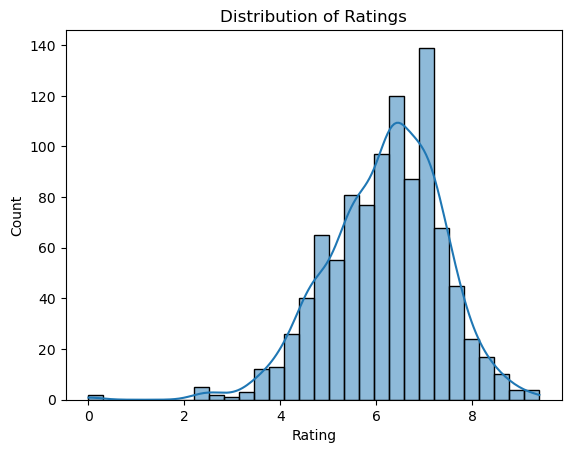

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df1['Rating'], kde=True)
plt.title('Distribution of Ratings')
plt.show()

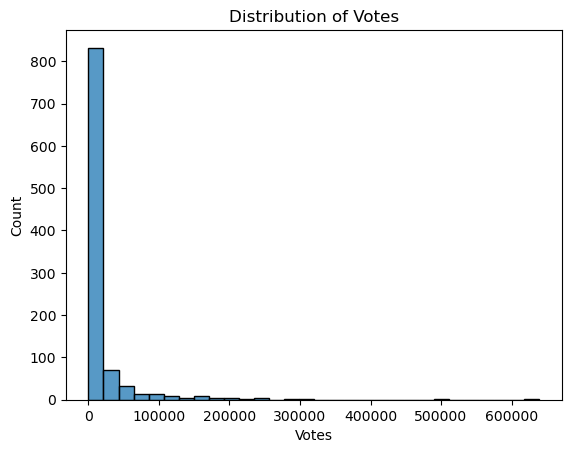

In [53]:
sns.histplot(df1['Votes'], bins=30)
plt.title('Distribution of Votes')
plt.show()

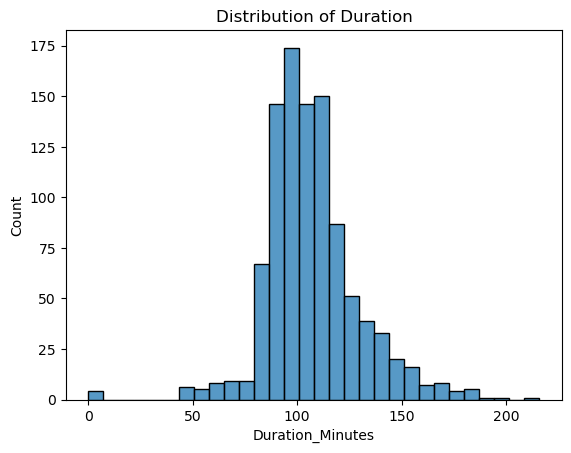

In [54]:

sns.histplot(df1['Duration_Minutes'], bins=30)
plt.title('Distribution of Duration')
plt.show()

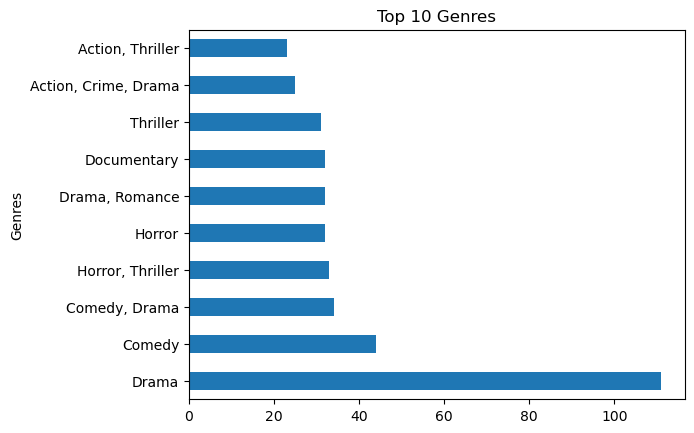

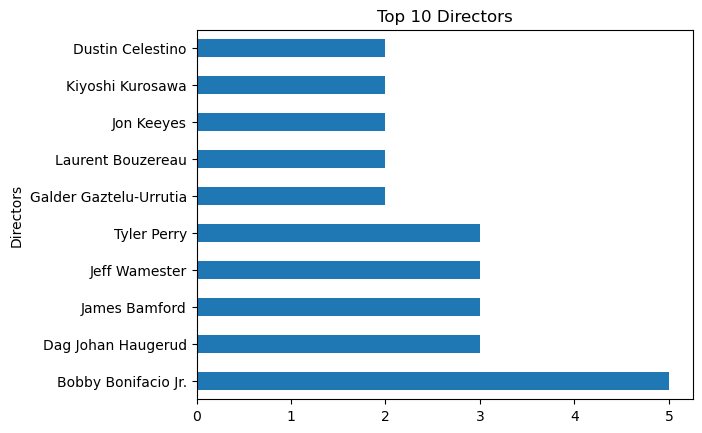

In [55]:
df1['Genres'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Genres')
plt.show()

df1['Directors'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Directors')
plt.show()


In [ ]:
BIVARIATE ANALYSIS

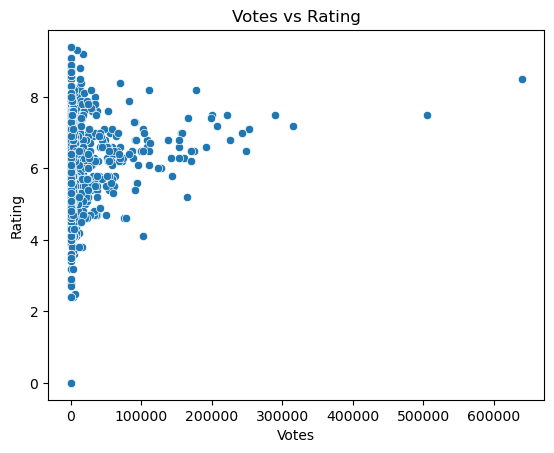

In [56]:
sns.scatterplot(x='Votes', y='Rating', data=df1)
plt.title('Votes vs Rating')
plt.show()


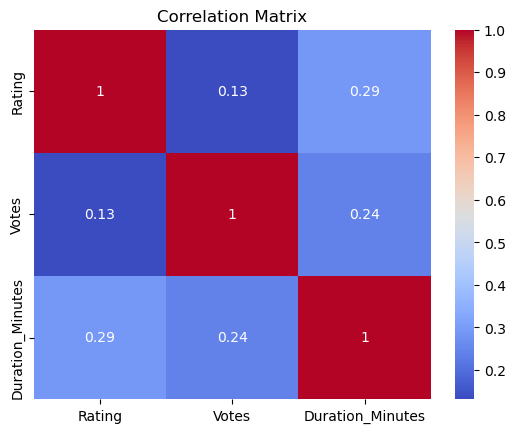

In [57]:
sns.heatmap(df1[['Rating', 'Votes', 'Duration_Minutes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


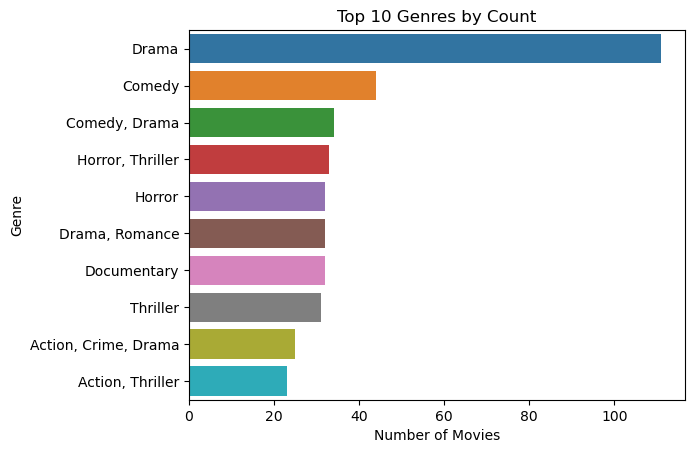

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y=df1['Genres'], order=df1['Genres'].value_counts().head(10).index)
plt.title('Top 10 Genres by Count')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


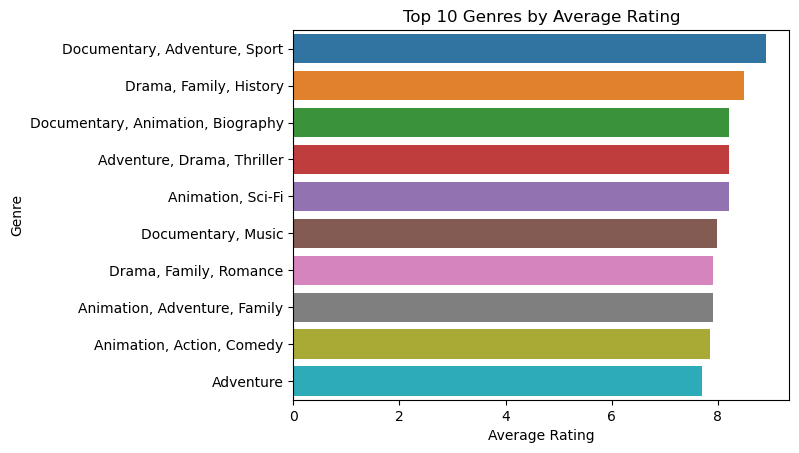

In [60]:
avg_rating = df1.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating.values, y=avg_rating.index)
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


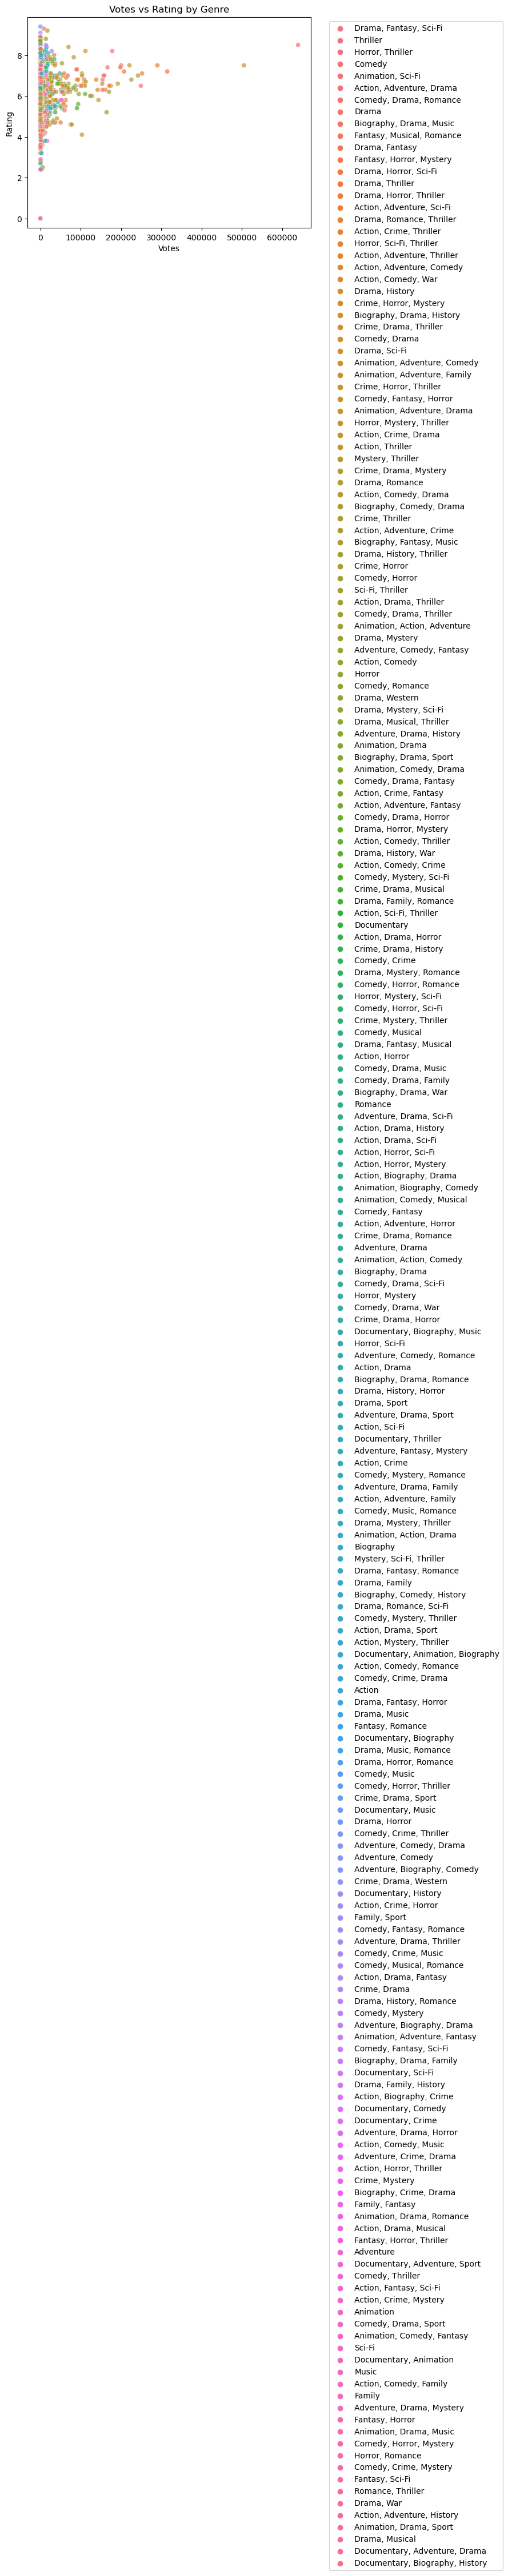

In [62]:
sns.scatterplot(data=df1, x='Votes', y='Rating', hue='Genres', alpha=0.7)
plt.title('Votes vs Rating by Genre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


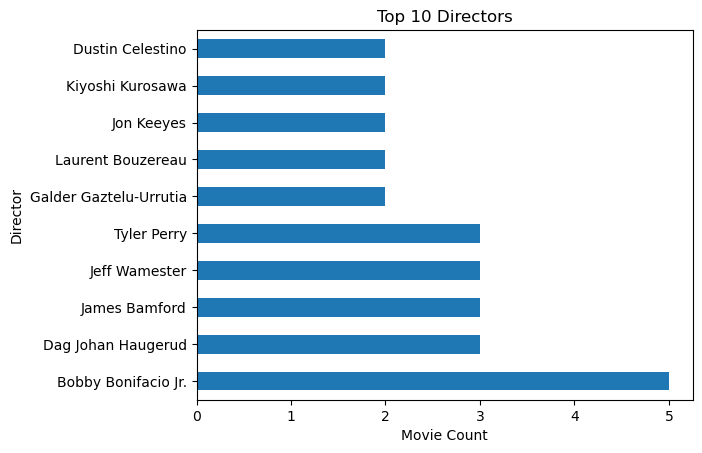

In [64]:
df1['Directors'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Directors')
plt.xlabel('Movie Count')
plt.ylabel('Director')
plt.show()


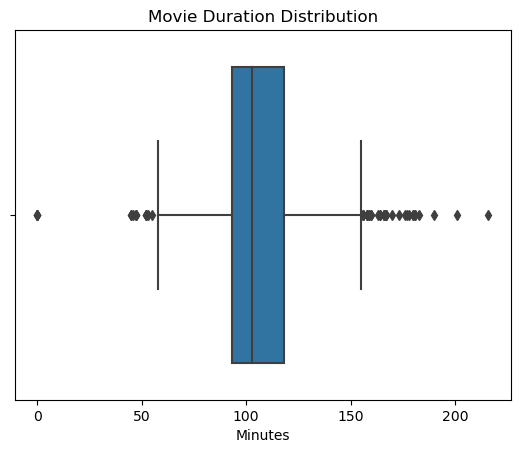

In [65]:
sns.boxplot(x=df1['Duration_Minutes'])
plt.title('Movie Duration Distribution')
plt.xlabel('Minutes')
plt.show()


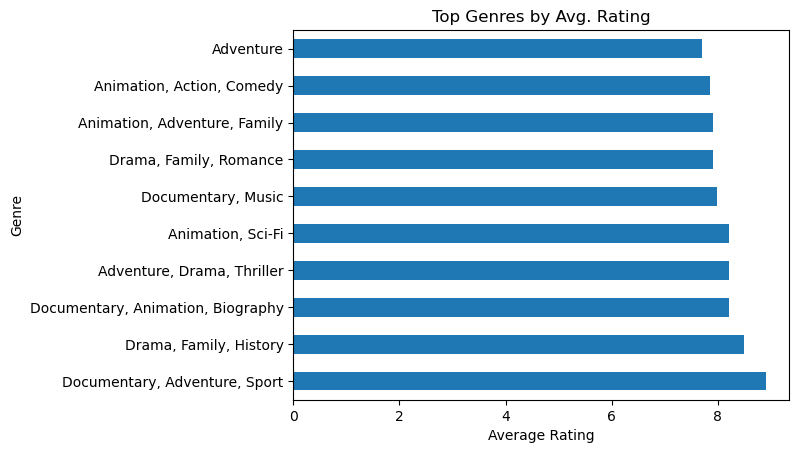

In [66]:
avg_rating = df1.groupby('Genres')['Rating'].mean().sort_values(ascending=False)
avg_rating.head(10).plot(kind='barh')
plt.title('Top Genres by Avg. Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


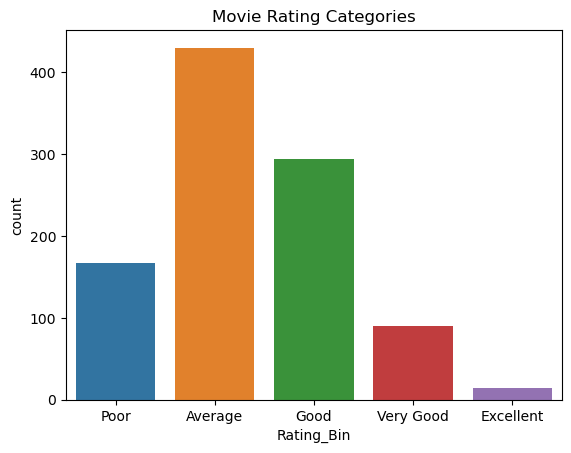

In [67]:
df1['Rating_Bin'] = pd.cut(df1['Rating'], bins=[0, 5, 6.5, 7.5, 8.5, 10], labels=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])

sns.countplot(x='Rating_Bin', data=df1, order=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])
plt.title('Movie Rating Categories')
plt.show()


In [ ]:
Genre-Based Rating Leaders (Top-rated movie per genre)

In [68]:
top_rated_by_genre = df1.loc[df1.groupby("Genres")["Rating"].idxmax()][["Genres", "Title", "Rating"]]
print(top_rated_by_genre)


                        Genres                              Title  Rating
834                     Action                         835. Sasan     8.7
24   Action, Adventure, Comedy           25. Deadpool & Wolverine     7.5
60    Action, Adventure, Crime             61. The Unholy Trinity     7.0
17    Action, Adventure, Drama                 18. Dune: Part Two     8.5
307  Action, Adventure, Family  308. Descendants: The Rise of Red     4.7
..                         ...                                ...     ...
629                    Romance                      630. Addition     8.3
919          Romance, Thriller                 920. Haunted Heart     4.8
811                     Sci-Fi                      812. Planet B     4.9
921           Sci-Fi, Thriller                      922. In Vitro     6.4
439                   Thriller                        440. Logout     7.2

[213 rows x 3 columns]


In [ ]:
Most Popular Genres by Voting (Pie Chart)

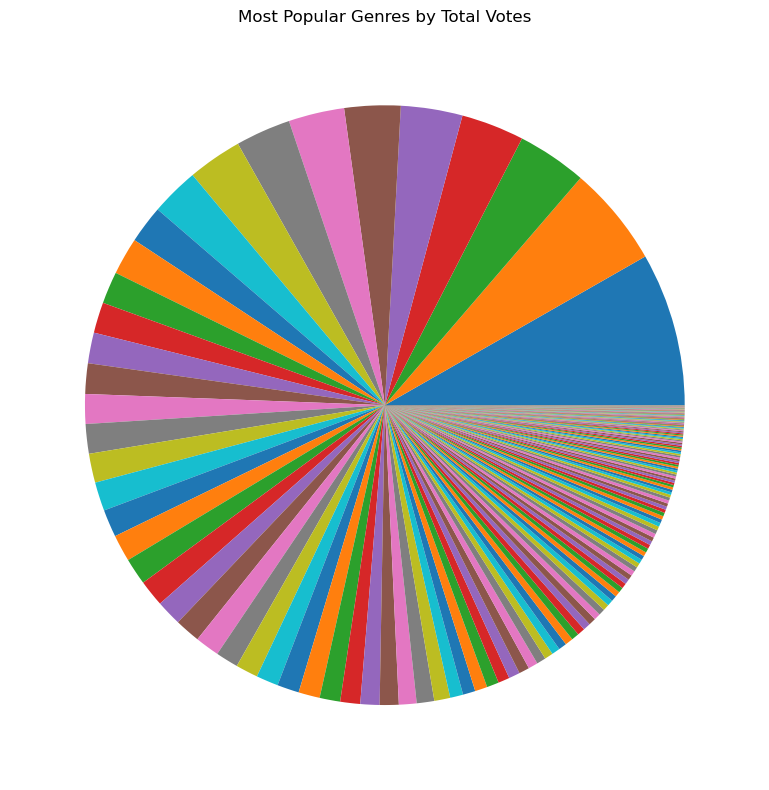

In [70]:
import matplotlib.pyplot as plt

genre_votes = df1.groupby("Genres")["Votes"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
plt.pie(genre_votes)
plt.title("Most Popular Genres by Total Votes")
plt.tight_layout()
plt.show()

In [71]:
shortest_movie = df1.loc[df1["Duration_Minutes"].idxmin()][["Title", "Duration_Minutes"]]
longest_movie = df1.loc[df1["Duration_Minutes"].idxmax()][["Title", "Duration_Minutes"]]

print("Shortest Movie:")
print(shortest_movie)

print("\nLongest Movie:")
print(longest_movie)


Shortest Movie:
Title               516. Bahodir Yalangto'sh
Duration_Minutes                           0
Name: 515, dtype: object

Longest Movie:
Title               8. The Brutalist
Duration_Minutes                 216
Name: 7, dtype: object


In [73]:
# Final save (main combined file)
df1.to_csv("imdb_2024_movies_detailed.csv", index=False)
print("✅ Data saved to imdb_2024_movies_detailed.csv")

# Save data into separate CSVs per genre
genre_map = {}

for _, row in df1.iterrows():
    genres = [g.strip() for g in str(row['Genres']).split(',')]
    for genre in genres:
        if genre not in genre_map:
            genre_map[genre] = []
        genre_map[genre].append(row)

# Save each genre's movies to individual CSV
for genre, rows in genre_map.items():
    genre_df = pd.DataFrame(rows)
    safe_genre = genre.replace(" ", "_").replace("/", "_").replace("\\", "_")
    filename = f"genre_{safe_genre}.csv"
    genre_df.to_csv(filename, index=False)
    print(f"📁 Saved {len(rows)} movies to {filename}")


✅ Data saved to imdb_2024_movies_detailed.csv
📁 Saved 497 movies to genre_Drama.csv
📁 Saved 44 movies to genre_Fantasy.csv
📁 Saved 55 movies to genre_Sci-Fi.csv
📁 Saved 228 movies to genre_Thriller.csv
📁 Saved 172 movies to genre_Horror.csv
📁 Saved 243 movies to genre_Comedy.csv
📁 Saved 55 movies to genre_Animation.csv
📁 Saved 206 movies to genre_Action.csv
📁 Saved 99 movies to genre_Adventure.csv
📁 Saved 105 movies to genre_Romance.csv
📁 Saved 65 movies to genre_Biography.csv
📁 Saved 32 movies to genre_Music.csv
📁 Saved 9 movies to genre_Musical.csv
📁 Saved 68 movies to genre_Mystery.csv
📁 Saved 123 movies to genre_Crime.csv
📁 Saved 5 movies to genre_War.csv
📁 Saved 39 movies to genre_History.csv
📁 Saved 19 movies to genre_Family.csv
📁 Saved 4 movies to genre_Western.csv
📁 Saved 14 movies to genre_Sport.csv
📁 Saved 60 movies to genre_Documentary.csv
